In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [20]:
df = pd.read_csv('CarPrice_data.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.isnull().sum().sum()

0

In [5]:
cat_data = df.select_dtypes(include='object')
num_data = df.select_dtypes(include='number')

## Data Cleaning and EDA

#### Categorigal features
- We'll drop any unnecessary columns and check the rest for the transformation stage later. 

In [6]:
cat_data.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [7]:
for column in cat_data.columns.values:
    print(cat_data[column].value_counts(), '\n')

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64 

fueltype
gas       185
diesel     20
Name: count, dtype: int64 

aspiration
std      168
turbo     37
Name: count, dtype: int64 

doornumber
four    115
two      90
Name: count, dtype: int64 

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64 

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64 

enginelocation
front    202
rear       3
Name: count, dtype: int64 

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64 

cylindernumber
four      159
six        24
five       11
eight       5
two 

###### Wrangling process:
- Extract the car company from CarName and see if we can use it as a feature.
- Drop enginelocation as it probably won't be valuable to our model.
- Encode the rest of the features.

CarName

In [8]:
cat_data['car_company'] = cat_data['CarName'].str.split().str.get(0)

In [9]:
cat_data.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [10]:
cat_data['car_company'].value_counts()

car_company
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64

In [11]:
# correcting the typo errors in make values
cat_data["car_company"] = cat_data["car_company"].replace({"maxda":"mazda",
                                                     "Nissan":"nissan",
                                                     "porcshce":"porsche",
                                                     "toyouta":"toyota",
                                                     "vokswagen":"volkswagen",
                                                     "vw":"volkswagen"})

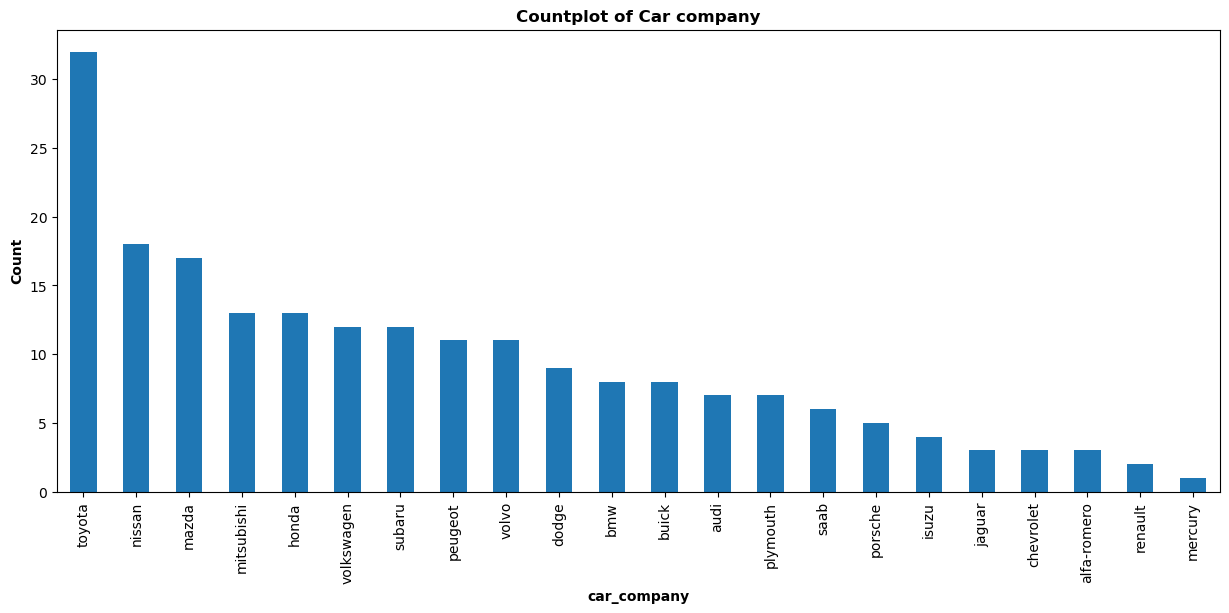

In [12]:
plt.figure(figsize=(15,6))
cat_data["car_company"].value_counts().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.xlabel("car_company", fontweight="bold")
plt.ylabel("Count", fontweight="bold")
plt.title("Countplot of Car company", fontweight="bold")
plt.show()

In [13]:
cat_data_price = pd.concat([cat_data, df['price']], axis=1)
cat_data_price.head(1)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,13495.0


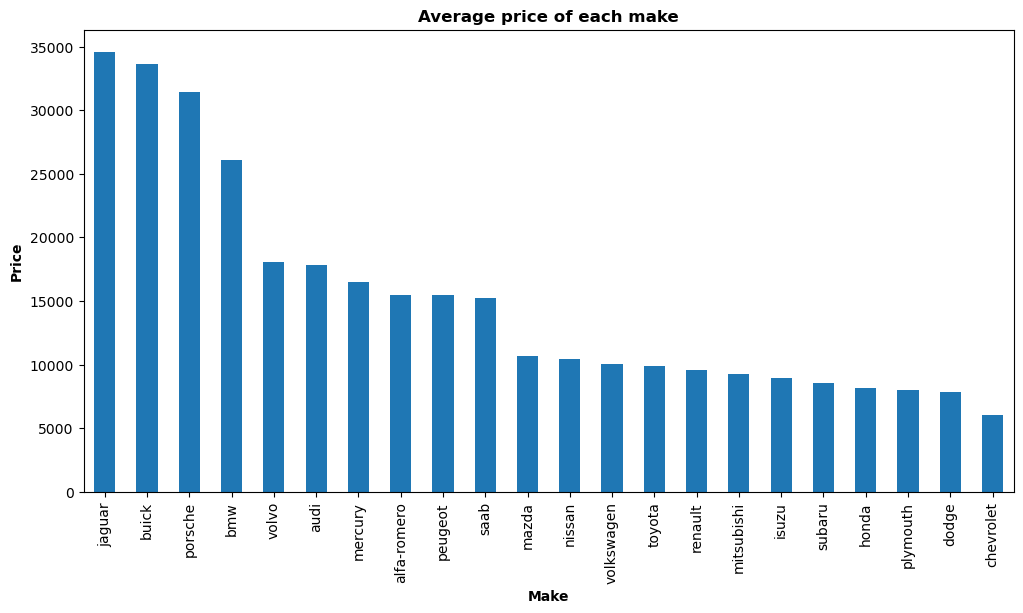

In [14]:
# average price of each company
cat_data_price.groupby("car_company")["price"].mean().sort_values(ascending=False).plot.bar(figsize=(12,6))
plt.title("Average price of each make", fontweight="bold")
plt.ylabel("Price", fontweight="bold")
plt.xlabel("Make", fontweight="bold")
plt.show()

- Looking at the two graphs, the underlying insight is that companies the sold more or their models were most frequent (gragh 1: toyota, nisan, mazda ...) have less average price than companies with fewer cars but hugh average (gragh 2: jaguar, buick, porsche ...)
- It seems that the best approach is to drop this column as it's hard to encode high cardinality with such few records.

In [15]:
cat_data = cat_data.drop(['CarName', 'car_company'], axis=1)


In [16]:
cat_data.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [17]:
# chekpoint for categorical feature

cat_df = cat_data.copy()

fueltype & aspiration
- categorize the three of them into two categories
  - fueltype {gas : 0, diesel: 1}
  - aspiration {std : 0, turbo : 1}

In [18]:
# cat_df['fueltype'] = cat_df['fueltype'].map({'gas' : 0, 'diesel' : 1})
# cat_df['aspiration'] = cat_df['aspiration'].map({'std' : 0, 'turbo' : 1})
# cat_df['doornumber'] = cat_df['doornumber'].map({'four' : 4, 'two' : 2})

# cat_df.head()

doornumber

In [19]:
cat_df['doornumber'] = cat_df['doornumber'].map({'four' : 4, 'two' : 2})
cat_df['doornumber'].value_counts()

doornumber
4    115
2     90
Name: count, dtype: int64

carbody

In [20]:
cat_df['carbody'].value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

- We'll group hardtop & convertible together as (other) to be easier for encoding them later.

In [21]:
cat_df['carbody'] = cat_df['carbody'].map({'sedan' : 'sedan', 'hatchback' : 'hatchback', 'wagon' : 'wagon', 
                                           'hardtop' : 'other', 'convertible' : 'other'})


In [22]:
cat_df['carbody'].value_counts()

carbody
sedan        96
hatchback    70
wagon        25
other        14
Name: count, dtype: int64

drivewheel

In [23]:
cat_df['drivewheel'].value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

- we'll encode drivewheel into three categories {fwd : 0, rwd : 1 , 4wd : 2}

In [24]:
# cat_df['drivewheel'] = cat_df['drivewheel'].map({'fwd' : 0, 'rwd' : 1, '4wd' : 2})

# cat_df.head()

enginetype

In [25]:
cat_df['enginetype'].value_counts()

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

We'll regroup enginetype as  following:
- ohc (Overhead Camshaft): This category can include "ohc" and "dohc" since they both represent overhead camshaft configurations. We'll merge them together "ohc" (148) and "dohc" (12) to get a total of 160.
- ohcf (Overhead Camshaft Fuel Injection): We'll Keep this category as it is.
- ohcv (Overhead Camshaft Valve): We'll keep this category as it is since it represents a different type of overhead camshaft configuration.
- l (L-configuration): We'll keep this category as it is.
- Others: We'll group the remaining categories together as "Others" since they have limited occurrences.  "rotor" (4) and "dohcv" (1)..

In [26]:
cat_df['enginetype'] = cat_df['enginetype'].map({'ohc' : 'ohc', 
                                                 'ohcf' : 'ohcf', 
                                                 'ohcv' : 'ohcv', 
                                                 'dohc' : 'ohc', 
                                                 'l' : 'l', 
                                                 'rotor' : 'other', 
                                                 'dohcv' : 'other'})

cat_df['enginetype'].value_counts()

enginetype
ohc      160
ohcf      15
ohcv      13
l         12
other      5
Name: count, dtype: int64

cylindernumber

In [27]:
cat_df['cylindernumber'].value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

- we'll just write the numbers in integers

In [28]:
cat_df['cylindernumber'] = cat_df['cylindernumber'].map({'four' : 4, 'six' : 6, 'five' : 5, 'eight' : 8, 'two' : 2, 
                                                         'three' : 3, 'twelve' : 12})

cat_df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,2,other,rwd,front,ohc,4,mpfi
1,gas,std,2,other,rwd,front,ohc,4,mpfi
2,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi
3,gas,std,4,sedan,fwd,front,ohc,4,mpfi
4,gas,std,4,sedan,4wd,front,ohc,5,mpfi


In [29]:
cat_df['cylindernumber'].value_counts()

cylindernumber
4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: count, dtype: int64

fuelsystem

In [30]:
cat_df['fuelsystem'].value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

- we'll take similar approach as we did with enginetype

In [31]:
cat_df['fuelsystem'] = cat_df['fuelsystem'].map({'mpfi': 'mpfi',
                                                 '2bbl': '2bbl',
                                                 'idi': 'idi',
                                                 '1bbl': '1bbl',
                                                 'spdi': 'spdi',
                                                 '4bbl': 'Others',
                                                 'mfi': 'Others',
                                                 'spfi': 'Others'})

cat_df['fuelsystem'].value_counts()

fuelsystem
mpfi      94
2bbl      66
idi       20
1bbl      11
spdi       9
Others     5
Name: count, dtype: int64

In [32]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   fueltype        205 non-null    object
 1   aspiration      205 non-null    object
 2   doornumber      205 non-null    int64 
 3   carbody         205 non-null    object
 4   drivewheel      205 non-null    object
 5   enginelocation  205 non-null    object
 6   enginetype      205 non-null    object
 7   cylindernumber  205 non-null    int64 
 8   fuelsystem      205 non-null    object
dtypes: int64(2), object(7)
memory usage: 14.5+ KB


#### Numerical features

In [34]:
num_data.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [35]:
# dropping car_ID column
num_data.drop('car_ID', axis=1, inplace=True)

In [36]:
num_data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [37]:
num_data['symboling'].value_counts()

symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64

- symboling : Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 

<Axes: xlabel='symboling', ylabel='price'>

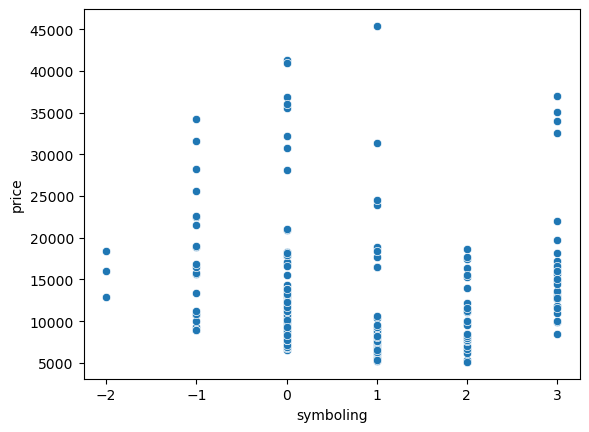

In [38]:
sns.scatterplot(x='symboling', y='price', data=num_data)

<Axes: >

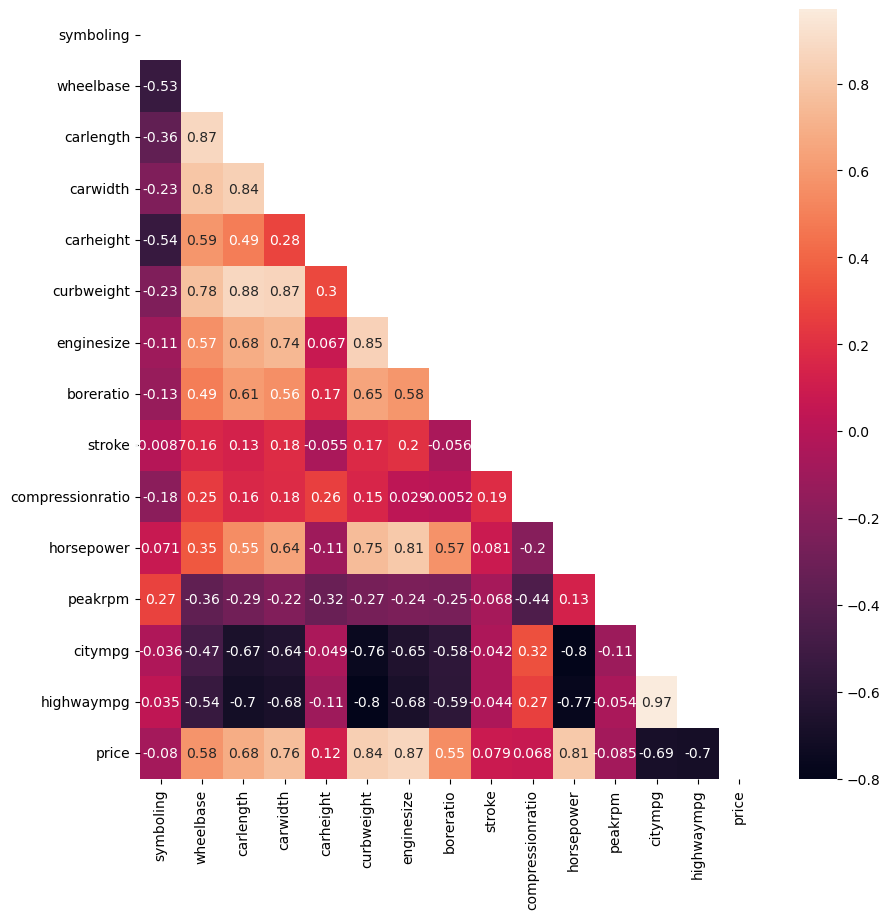

In [39]:
fig = plt.figure(figsize=(10,10))

mask = np.triu(np.ones_like(num_data.corr()))
sns.heatmap(num_data.corr(), mask=mask, annot=True)

- symboling, stroke, copressionratio and peakrpm are the least correlated to the target feature. for now we'll keep all features and later we'll do some feature engineering.

In [40]:
# checkpoint for numerical features

num_df = num_data.copy()

In [41]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaled_raw = scaler.fit_transform(num_df)

# numerical_columns = pd.DataFrame(
#     scaled_raw, 
#     columns=num_df.columns
# )
# numerical_columns.head()

## Splitting and Training

In [42]:
df_cleaned = pd.concat([cat_df,num_df], axis=1)

df_cleaned.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,symboling,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,2,other,rwd,front,ohc,4,mpfi,3,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,2,other,rwd,front,ohc,4,mpfi,3,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi,1,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,4,sedan,fwd,front,ohc,4,mpfi,2,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,4,sedan,4wd,front,ohc,5,mpfi,2,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [43]:
df_cleaned.shape

(205, 24)

In [44]:
X = df_cleaned.iloc[:,:-1]
y = df_cleaned['price']

In [45]:
X.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,symboling,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,2,other,rwd,front,ohc,4,mpfi,3,...,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,gas,std,2,other,rwd,front,ohc,4,mpfi,3,...,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi,1,...,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,gas,std,4,sedan,fwd,front,ohc,4,mpfi,2,...,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,gas,std,4,sedan,4wd,front,ohc,5,mpfi,2,...,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [46]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state = 42)

###### Creating Basline Model : Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import LabelEncoder

In [49]:
# Ceating function to calculate Evaluation metrics
def eval_metrics(y_test, y_pred):   
    ''' Calculates MAE, MSE, RMSE and R2'''
    
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)
    return mae, mse, rmse, r2


def print_metrics(mae, mse, rmse, r2):    
    ''' Prints the evaluation metrics '''
    
    print('Mean Absolute Error:', mae)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('Coefficient of determination R^2:', r2)
    

def calculate_vif(df):    
    '''Calculates Varience Inflation Factor'''
    
    vif_data = df #creating df with the features to check
    vif_data = add_constant(vif_data)
    vif = pd.DataFrame()
    vif["Variable"] = vif_data.columns
    vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
    return vif


In [63]:
df_cleaned.head(3)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,symboling,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,2,other,rwd,front,ohc,4,mpfi,3,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,2,other,rwd,front,ohc,4,mpfi,3,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi,1,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0


In [64]:
columns_to_encode = df_cleaned.select_dtypes(include='object').columns.values
columns_to_encode

array(['fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem'], dtype=object)

In [65]:
df_cleaned.select_dtypes(include='number').head(3)

,doornumber,cylindernumber,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,4,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,4,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,2,6,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0


- We don't want to scale doornumber, cylindernumber and symboling.

In [66]:
df_cleaned.select_dtypes(include='number').columns.values

array(['doornumber', 'cylindernumber', 'symboling', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price'], dtype=object)

In [67]:
columns_to_scale = ['wheelbase','carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
                    'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

In [72]:
transformer = ColumnTransformer(transformers=[('cat', OneHotEncoder(), columns_to_encode),
                                              ('num', StandardScaler(), columns_to_scale)],
                                remainder='passthrough')

In [73]:
pipe = Pipeline([('preprocessor', transformer),
                 ('model' , LinearRegression())])

In [74]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  array(['fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem'], dtype=object)),
                                                 ('num', StandardScaler(),
                                                  ['wheelbase', 'carlength',
                                                   'carwidth', 'carheight',
                                                   'curbweight', 'enginesize',
                                                   'boreratio', 'stroke',
                                                   'compressionratio',
                                                   'horsepower', 'peakrpm',
                                                   'citympg',
                                                   'highwaympg'])])),
                ('model', LinearRegression())])

In [80]:
y_pred = pipe.predict(X_test)

In [81]:
mae, mse, rmse, r2 = eval_metrics(y_test,y_pred)

print_metrics(mae, mse, rmse, r2)


Mean Absolute Error: 2311.105682926829
Mean Squared Error: 14873681.632582659
Root Mean Squared Error: 3856.6412372144055
Coefficient of determination R^2: 0.8115920437438053


###### Exploring different models

In [82]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


In [83]:
ridge_pipe = Pipeline([('preprocessor', transformer),
                       ('model' , Ridge())])

ridge_param = {'model__alpha': [0.1, 1.0, 10.0], 
               'model__fit_intercept' : [True, False]}

ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param, scoring='neg_mean_squared_error', cv=10, verbose=3)
ridge_grid.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10] END model__alpha=0.1, model__fit_intercept=True;, score=-6445881.804 total time=   0.0s
[CV 2/10] END model__alpha=0.1, model__fit_intercept=True;, score=-7111260.099 total time=   0.0s
[CV 3/10] END model__alpha=0.1, model__fit_intercept=True;, score=-8177266.642 total time=   0.0s
[CV 4/10] END model__alpha=0.1, model__fit_intercept=True;, score=-3949818.598 total time=   0.0s
[CV 5/10] END model__alpha=0.1, model__fit_intercept=True;, score=-4666720.315 total time=   0.0s
[CV 6/10] END model__alpha=0.1, model__fit_intercept=True;, score=-6057370.423 total time=   0.0s
[CV 7/10] END model__alpha=0.1, model__fit_intercept=True;, score=-3963607.339 total time=   0.0s
[CV 8/10] END model__alpha=0.1, model__fit_intercept=True;, score=-12069046.253 total time=   0.0s
[CV 9/10] END model__alpha=0.1, model__fit_intercept=True;, score=-3549044.261 total time=   0.0s
[CV 10/10] END model__alpha=0.1, model__fit_intercept=Tr

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         array(['fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem'], dtype=object)),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['wheelbase',
                                                                          'carlength',
                                                                          'carwidth',
                                                                          'carheight',
                                                                          'curbweight',
                                                                          'enginesize',
                                                                          'boreratio',
                                                                          'stroke',
                                                                          'compressionratio',
                                                                          'horsepower',
                                                                          'peakrpm',
                                                                          'citympg',
                                                                          'highwaympg'])])),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [0.1, 1.0, 10.0],
                         'model__fit_intercept': [True, False]},
             scoring='neg_mean_squared_error', verbose=3)

In [84]:
best_model = ridge_grid.best_estimator_
y_pred = best_model.predict(X_test)

In [85]:
mae, mse, rmse, r2 = eval_metrics(y_test,y_pred)

print_metrics(mae, mse, rmse, r2)

Mean Absolute Error: 2303.728888088895
Mean Squared Error: 14930389.062953025
Root Mean Squared Error: 3863.9861623656243
Coefficient of determination R^2: 0.8108737191672448


In [86]:
from sklearn.ensemble import RandomForestRegressor

rf_pipe = Pipeline([('preprocessor', transformer),
                    ('model' , RandomForestRegressor())])

rf_param = { 
    'model__n_estimators': [25, 50, 100, 150], 
    'model__max_features': ['sqrt', 'log2', None], 
    'model__max_depth': [3, 6, 9], 
    'model__max_leaf_nodes': [3, 6, 9], 
} 


rf_grid = GridSearchCV(rf_pipe, param_grid=rf_param, scoring='neg_mean_squared_error', cv=10, verbose=3)
rf_grid.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV 1/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=25;, score=-8464728.036 total time=   0.0s
[CV 2/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=25;, score=-17864839.287 total time=   0.0s
[CV 3/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=25;, score=-9655159.465 total time=   0.0s
[CV 4/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=25;, score=-7824970.087 total time=   0.0s
[CV 5/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=25;, score=-15662940.644 total time=   0.0s
[CV 6/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=25;, score=-5511247.557 total time=   0.0s
[CV 7/10] END model__max_depth=3, model__max_

[CV 6/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=50;, score=-3833611.182 total time=   0.0s
[CV 7/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=50;, score=-3265766.303 total time=   0.0s
[CV 8/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=50;, score=-10916583.983 total time=   0.0s
[CV 9/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=50;, score=-3232540.427 total time=   0.0s
[CV 10/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=50;, score=-21328940.784 total time=   0.0s
[CV 1/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=100;, score=-5084886.804 total time=   0.0s
[CV 2/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=100

[CV 2/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=150;, score=-7505323.700 total time=   0.1s
[CV 3/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=150;, score=-3536479.863 total time=   0.1s
[CV 4/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=150;, score=-4537382.219 total time=   0.1s
[CV 5/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=150;, score=-10956769.143 total time=   0.0s
[CV 6/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=150;, score=-3627713.476 total time=   0.0s
[CV 7/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=150;, score=-2453286.859 total time=   0.0s
[CV 8/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=

[CV 10/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=25;, score=-22722775.713 total time=   0.0s
[CV 1/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=50;, score=-5893202.786 total time=   0.0s
[CV 2/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=50;, score=-10850492.644 total time=   0.0s
[CV 3/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=50;, score=-5317994.481 total time=   0.0s
[CV 4/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=50;, score=-4238144.440 total time=   0.0s
[CV 5/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=50;, score=-12206646.823 total time=   0.0s
[CV 6/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=50;

[CV 7/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=100;, score=-3216703.518 total time=   0.0s
[CV 8/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=100;, score=-9105326.986 total time=   0.0s
[CV 9/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=100;, score=-3736570.432 total time=   0.0s
[CV 10/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=100;, score=-21548259.157 total time=   0.0s
[CV 1/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=150;, score=-5228465.679 total time=   0.0s
[CV 2/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=150;, score=-10607622.143 total time=   0.1s
[CV 3/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimator

[CV 4/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=25;, score=-5097760.925 total time=   0.0s
[CV 5/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=25;, score=-16606380.804 total time=   0.0s
[CV 6/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=25;, score=-7902728.388 total time=   0.0s
[CV 7/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=25;, score=-4710571.003 total time=   0.0s
[CV 8/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=25;, score=-7591741.860 total time=   0.0s
[CV 9/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=25;, score=-7978149.013 total time=   0.0s
[CV 10/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=25;, 

[CV 1/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=100;, score=-5138609.831 total time=   0.1s
[CV 2/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=100;, score=-6492876.841 total time=   0.1s
[CV 3/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=100;, score=-3033274.044 total time=   0.2s
[CV 4/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=100;, score=-4611406.226 total time=   0.2s
[CV 5/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=100;, score=-17323508.375 total time=   0.1s
[CV 6/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=100;, score=-8090222.483 total time=   0.1s
[CV 7/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=

[CV 6/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=150;, score=-5089213.873 total time=   0.1s
[CV 7/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=150;, score=-6976623.094 total time=   0.1s
[CV 8/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=150;, score=-15537552.506 total time=   0.1s
[CV 9/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=150;, score=-7614122.837 total time=   0.2s
[CV 10/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=150;, score=-29997141.389 total time=   0.1s
[CV 1/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=25;, score=-4742749.119 total time=   0.0s
[CV 2/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators

[CV 4/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=50;, score=-4446126.554 total time=   0.0s
[CV 5/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=50;, score=-12043571.206 total time=   0.0s
[CV 6/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=50;, score=-5080594.954 total time=   0.0s
[CV 7/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=50;, score=-2697314.347 total time=   0.0s
[CV 8/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=50;, score=-9789627.943 total time=   0.0s
[CV 9/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=50;, score=-1826282.987 total time=   0.0s
[CV 10/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=50;, 

[CV 1/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=150;, score=-7402002.874 total time=   0.1s
[CV 2/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=150;, score=-20119636.940 total time=   0.1s
[CV 3/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=150;, score=-12605651.849 total time=   0.1s
[CV 4/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=150;, score=-11581083.070 total time=   0.1s
[CV 5/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=150;, score=-16680128.217 total time=   0.1s
[CV 6/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=150;, score=-5026673.344 total time=   0.1s
[CV 7/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimato

[CV 1/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=50;, score=-4548171.005 total time=   0.0s
[CV 2/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=50;, score=-6464007.659 total time=   0.0s
[CV 3/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=50;, score=-2569257.510 total time=   0.0s
[CV 4/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=50;, score=-4054293.736 total time=   0.0s
[CV 5/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=50;, score=-12529738.741 total time=   0.0s
[CV 6/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=50;, score=-4245361.680 total time=   0.0s
[CV 7/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=50;, s

[CV 7/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=100;, score=-3652170.942 total time=   0.1s
[CV 8/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=100;, score=-8628209.330 total time=   0.1s
[CV 9/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=100;, score=-7173192.666 total time=   0.1s
[CV 10/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=100;, score=-18656874.961 total time=   0.1s
[CV 1/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=150;, score=-6759651.682 total time=   0.2s
[CV 2/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=150;, score=-7201510.704 total time=   0.1s
[CV 3/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators

[CV 3/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=25;, score=-2616209.746 total time=   0.0s
[CV 4/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=25;, score=-4291243.581 total time=   0.0s
[CV 5/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=25;, score=-14877290.267 total time=   0.0s
[CV 6/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=25;, score=-8573467.452 total time=   0.0s
[CV 7/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=25;, score=-4124839.751 total time=   0.0s
[CV 8/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=25;, score=-6094621.330 total time=   0.0s
[CV 9/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=25;, s

[CV 10/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=50;, score=-33985689.779 total time=   0.0s
[CV 1/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=100;, score=-7769365.399 total time=   0.0s
[CV 2/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=100;, score=-18487209.832 total time=   0.0s
[CV 3/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=100;, score=-9983992.205 total time=   0.0s
[CV 4/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=100;, score=-10728934.729 total time=   0.0s
[CV 5/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=100;, score=-15623678.992 total time=   0.1s
[CV 6/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimato

[CV 6/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=150;, score=-3503088.131 total time=   0.1s
[CV 7/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=150;, score=-3259809.504 total time=   0.1s
[CV 8/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=150;, score=-11661496.051 total time=   0.1s
[CV 9/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=150;, score=-1877957.976 total time=   0.1s
[CV 10/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=150;, score=-19959361.488 total time=   0.1s
[CV 1/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=25;, score=-4552995.012 total time=   0.0s
[CV 2/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators

[CV 4/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=50;, score=-9865022.329 total time=   0.0s
[CV 5/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=50;, score=-17228364.089 total time=   0.0s
[CV 6/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=50;, score=-5414863.870 total time=   0.0s
[CV 7/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=50;, score=-9289100.121 total time=   0.0s
[CV 8/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=50;, score=-21464493.014 total time=   0.0s
[CV 9/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=50;, score=-10058077.213 total time=   0.0s
[CV 10/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=50;

[CV 10/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=100;, score=-19601064.626 total time=   0.0s
[CV 1/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=150;, score=-4797158.742 total time=   0.1s
[CV 2/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=150;, score=-8480585.424 total time=   0.1s
[CV 3/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=150;, score=-3257676.338 total time=   0.2s
[CV 4/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=150;, score=-4472327.356 total time=   0.1s
[CV 5/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=150;, score=-11478054.309 total time=   0.1s
[CV 6/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimator

[CV 9/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=25;, score=-6398831.540 total time=   0.0s
[CV 10/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=25;, score=-20971500.251 total time=   0.0s
[CV 1/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=50;, score=-7200614.154 total time=   0.0s
[CV 2/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=50;, score=-6427426.196 total time=   0.0s
[CV 3/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=50;, score=-4269907.557 total time=   0.0s
[CV 4/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=50;, score=-7418171.922 total time=   0.0s
[CV 5/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=50;, 

[CV 5/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=100;, score=-17062232.992 total time=   0.1s
[CV 6/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=100;, score=-7723252.960 total time=   0.1s
[CV 7/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=100;, score=-3173084.842 total time=   0.1s
[CV 8/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=100;, score=-7050879.507 total time=   0.1s
[CV 9/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=100;, score=-6187269.340 total time=   0.1s
[CV 10/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=100;, score=-18561124.803 total time=   0.2s
[CV 1/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=6, model__n_estimator

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         array(['fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem'], dtype=object)),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['wheelbase',
                                                                          'carlength',
                                                                          'carwidth',
                                                                          'carheight',
                                                                          'curbweight',
                                                                          'enginesize',
                                                                          'boreratio',
                                                                          'stroke',
                                                                          'compressionratio',
                                                                          'horsepower',
                                                                          'peakrpm',
                                                                          'citympg',
                                                                          'highwaympg'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [3, 6, 9],
                         'model__max_features': ['sqrt', 'log2', None],
                         'model__max_leaf_nodes': [3, 6, 9],
                         'model__n_estimators': [25, 50, 100, 150]},
             scoring='neg_mean_squared_error', verbose=3)

In [87]:
rf_best_model = rf_grid.best_estimator_
y_pred_rf = rf_best_model.predict(X_test)

In [88]:
mae, mse, rmse, r2 = eval_metrics(y_test,y_pred_rf)

print_metrics(mae, mse, rmse, r2)

Mean Absolute Error: 1680.1200836635242
Mean Squared Error: 6514893.292888887
Root Mean Squared Error: 2552.4289006530403
Coefficient of determination R^2: 0.9174745190288673


- That's bettter but we probably could try a custom transformer
- We also could optimize our model through the features.

###### Creating Custom Transformer for categorical features

In [99]:
df_cleaned['enginelocation'].value_counts()

enginelocation
front    202
rear       3
Name: count, dtype: int64

In [100]:
from sklearn.base import BaseEstimator, TransformerMixin

class CategoricalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop=None):
        self.columns_to_drop = columns_to_drop
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        cat_df = X.copy()
        cat_df['fueltype'] = cat_df['fueltype'].map({'gas': 0, 'diesel': 1})
        cat_df['aspiration'] = cat_df['aspiration'].map({'std': 0, 'turbo': 1})
        cat_df['enginelocation'] = cat_df['enginelocation'].map({'front': 0, 'rear': 1})
        cat_df['carbody'] = cat_df['carbody'].map({'sedan': 0, 'hatchback': 1, 'wagon': 2, 'other': 3})
        cat_df['drivewheel'] = cat_df['drivewheel'].map({'fwd': 0, 'rwd': 1, '4wd': 2})
        cat_df['enginetype'] = cat_df['enginetype'].map({'ohc': 0, 'ohcf': 1, 'ohcv': 2, 'l': 3, 'other': 4})
        cat_df['fuelsystem'] = cat_df['fuelsystem'].map({'mpfi': 0, '2bbl': 1, 'idi': 2, '1bbl': 3, 'spdi': 4, 
                                                         'Others': 2})
        
        if self.columns_to_drop is not None:
            cat_df = cat_df.drop(self.columns_to_drop, axis=1)
            
        return cat_df

In [101]:
new_transformer = ColumnTransformer(transformers=[('cat', CategoricalTransformer(), columns_to_encode),
                                                  ('num', StandardScaler(), columns_to_scale)],
                                    remainder='passthrough')


rf_pipe_cat_trans = Pipeline([('preprocessor', new_transformer),
                    ('model' , RandomForestRegressor())])


rf_grid_new = GridSearchCV(rf_pipe_cat_trans, param_grid=rf_param, scoring='neg_mean_squared_error', cv=10, verbose=3)
rf_grid_new.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV 1/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=25;, score=-7718175.283 total time=   0.0s
[CV 2/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=25;, score=-18206868.003 total time=   0.0s
[CV 3/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=25;, score=-9672548.978 total time=   0.0s
[CV 4/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=25;, score=-7603036.280 total time=   0.0s
[CV 5/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=25;, score=-17296296.015 total time=   0.0s
[CV 6/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=25;, score=-5075285.077 total time=   0.0s
[CV 7/10] END model__max_depth=3, model__max_

[CV 7/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=50;, score=-2514391.183 total time=   0.0s
[CV 8/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=50;, score=-10327376.766 total time=   0.0s
[CV 9/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=50;, score=-1439097.259 total time=   0.0s
[CV 10/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=50;, score=-19055039.964 total time=   0.0s
[CV 1/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=100;, score=-5198573.729 total time=   0.0s
[CV 2/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=100;, score=-8222487.724 total time=   0.0s
[CV 3/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=10

[CV 3/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=150;, score=-3022745.293 total time=   0.1s
[CV 4/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=150;, score=-3957852.326 total time=   0.1s
[CV 5/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=150;, score=-10909151.595 total time=   0.1s
[CV 6/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=150;, score=-4016669.505 total time=   0.1s
[CV 7/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=150;, score=-2437213.626 total time=   0.1s
[CV 8/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=150;, score=-8943545.291 total time=   0.1s
[CV 9/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=

[CV 8/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=25;, score=-7243255.093 total time=   0.0s
[CV 9/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=25;, score=-3063892.744 total time=   0.0s
[CV 10/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=25;, score=-25332571.579 total time=   0.0s
[CV 1/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=50;, score=-5321457.863 total time=   0.0s
[CV 2/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=50;, score=-8973302.027 total time=   0.0s
[CV 3/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=50;, score=-3137798.179 total time=   0.0s
[CV 4/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=50;, 

[CV 5/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=100;, score=-9924738.326 total time=   0.0s
[CV 6/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=100;, score=-4574050.525 total time=   0.0s
[CV 7/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=100;, score=-2217278.948 total time=   0.0s
[CV 8/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=100;, score=-9133545.985 total time=   0.0s
[CV 9/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=100;, score=-2173586.863 total time=   0.0s
[CV 10/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=100;, score=-19480953.181 total time=   0.0s
[CV 1/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators

[CV 4/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=25;, score=-5322034.677 total time=   0.0s
[CV 5/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=25;, score=-14756105.325 total time=   0.0s
[CV 6/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=25;, score=-8071338.788 total time=   0.0s
[CV 7/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=25;, score=-3506683.489 total time=   0.0s
[CV 8/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=25;, score=-7495669.148 total time=   0.0s
[CV 9/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=25;, score=-5984755.816 total time=   0.0s
[CV 10/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=25;, 

[CV 10/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=50;, score=-16193476.770 total time=   0.0s
[CV 1/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=100;, score=-4842603.293 total time=   0.1s
[CV 2/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=100;, score=-7002254.146 total time=   0.1s
[CV 3/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=100;, score=-3105566.645 total time=   0.1s
[CV 4/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=100;, score=-5131835.292 total time=   0.1s
[CV 5/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=100;, score=-16108890.680 total time=   0.1s
[CV 6/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators

[CV 6/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=150;, score=-5296094.864 total time=   0.0s
[CV 7/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=150;, score=-6262780.580 total time=   0.1s
[CV 8/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=150;, score=-14623008.455 total time=   0.1s
[CV 9/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=150;, score=-6222309.278 total time=   0.1s
[CV 10/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=150;, score=-29472014.058 total time=   0.1s
[CV 1/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=25;, score=-5021829.058 total time=   0.0s
[CV 2/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators

[CV 3/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=50;, score=-2194121.807 total time=   0.0s
[CV 4/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=50;, score=-4220104.968 total time=   0.0s
[CV 5/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=50;, score=-11793288.952 total time=   0.0s
[CV 6/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=50;, score=-4378137.069 total time=   0.0s
[CV 7/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=50;, score=-2430724.089 total time=   0.0s
[CV 8/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=50;, score=-7067895.120 total time=   0.0s
[CV 9/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=50;, s

[CV 9/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=100;, score=-6124822.413 total time=   0.0s
[CV 10/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=100;, score=-30385653.101 total time=   0.0s
[CV 1/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=150;, score=-7502049.510 total time=   0.1s
[CV 2/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=150;, score=-17862430.123 total time=   0.0s
[CV 3/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=150;, score=-9818957.870 total time=   0.1s
[CV 4/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=150;, score=-9570227.555 total time=   0.1s
[CV 5/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimator

[CV 5/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=25;, score=-9176080.148 total time=   0.0s
[CV 6/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=25;, score=-4249950.603 total time=   0.0s
[CV 7/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=25;, score=-2068237.143 total time=   0.0s
[CV 8/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=25;, score=-6226960.066 total time=   0.0s
[CV 9/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=25;, score=-1263821.162 total time=   0.0s
[CV 10/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=25;, score=-15923512.480 total time=   0.0s
[CV 1/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=50;, 

[CV 1/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=100;, score=-6692517.219 total time=   0.1s
[CV 2/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=100;, score=-7892554.498 total time=   0.1s
[CV 3/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=100;, score=-4287315.698 total time=   0.1s
[CV 4/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=100;, score=-7190476.012 total time=   0.1s
[CV 5/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=100;, score=-21345287.185 total time=   0.0s
[CV 6/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=100;, score=-7488474.958 total time=   0.1s
[CV 7/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=

[CV 7/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=150;, score=-3468597.987 total time=   0.3s
[CV 8/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=150;, score=-6923073.249 total time=   0.2s
[CV 9/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=150;, score=-6354133.131 total time=   0.2s
[CV 10/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=150;, score=-16447437.270 total time=   0.2s
[CV 1/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=25;, score=-4739110.031 total time=   0.0s
[CV 2/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=25;, score=-5596632.408 total time=   0.0s
[CV 3/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=2

[CV 3/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=50;, score=-9114545.785 total time=   0.0s
[CV 4/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=50;, score=-9357194.524 total time=   0.0s
[CV 5/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=50;, score=-13702202.459 total time=   0.0s
[CV 6/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=50;, score=-5096279.698 total time=   0.0s
[CV 7/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=50;, score=-7434336.975 total time=   0.0s
[CV 8/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=50;, score=-15303654.949 total time=   0.0s
[CV 9/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=50;, 

[CV 9/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=100;, score=-2065435.784 total time=   0.0s
[CV 10/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=100;, score=-19045290.243 total time=   0.0s
[CV 1/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=150;, score=-4919168.995 total time=   0.1s
[CV 2/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=150;, score=-7247550.784 total time=   0.1s
[CV 3/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=150;, score=-2704135.955 total time=   0.1s
[CV 4/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=150;, score=-4469746.956 total time=   0.1s
[CV 5/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators

[CV 5/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=25;, score=-20350859.154 total time=   0.0s
[CV 6/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=25;, score=-5651580.994 total time=   0.0s
[CV 7/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=25;, score=-5221375.837 total time=   0.0s
[CV 8/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=25;, score=-11632241.475 total time=   0.0s
[CV 9/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=25;, score=-5398572.181 total time=   0.0s
[CV 10/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=25;, score=-35873095.417 total time=   0.0s
[CV 1/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=50;

[CV 2/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=100;, score=-7197842.362 total time=   0.1s
[CV 3/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=100;, score=-2773162.672 total time=   0.0s
[CV 4/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=100;, score=-4719280.849 total time=   0.0s
[CV 5/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=100;, score=-11043710.845 total time=   0.1s
[CV 6/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=100;, score=-4079792.548 total time=   0.0s
[CV 7/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=100;, score=-3021288.584 total time=   0.1s
[CV 8/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=

[CV 8/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=150;, score=-6203714.434 total time=   0.1s
[CV 9/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=150;, score=-1609168.780 total time=   0.1s
[CV 10/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=150;, score=-17392769.322 total time=   0.2s
[CV 1/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=25;, score=-6198154.647 total time=   0.0s
[CV 2/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=25;, score=-7391390.050 total time=   0.0s
[CV 3/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=25;, score=-3900985.955 total time=   0.0s
[CV 4/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=25

[CV 5/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=50;, score=-17569884.333 total time=   0.0s
[CV 6/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=50;, score=-7123490.163 total time=   0.0s
[CV 7/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=50;, score=-3850679.150 total time=   0.0s
[CV 8/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=50;, score=-7336921.282 total time=   0.0s
[CV 9/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=50;, score=-6590820.797 total time=   0.0s
[CV 10/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=50;, score=-16321836.267 total time=   0.0s
[CV 1/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=100;

[CV 1/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=150;, score=-4709513.293 total time=   0.2s
[CV 2/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=150;, score=-5775851.992 total time=   0.3s
[CV 3/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=150;, score=-2399691.206 total time=   0.3s
[CV 4/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=150;, score=-4157236.843 total time=   0.3s
[CV 5/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=150;, score=-14355721.024 total time=   0.2s
[CV 6/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=150;, score=-7834015.370 total time=   0.3s
[CV 7/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         CategoricalTransformer(),
                                                                         array(['fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem'], dtype=object)),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['wheelbase',
                                                                          'carlength',
                                                                          'carwidth',
                                                                          'carheight',
                                                                          'curbweight',
                                                                          'enginesize',
                                                                          'boreratio',
                                                                          'stroke',
                                                                          'compressionratio',
                                                                          'horsepower',
                                                                          'peakrpm',
                                                                          'citympg',
                                                                          'highwaympg'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [3, 6, 9],
                         'model__max_features': ['sqrt', 'log2', None],
                         'model__max_leaf_nodes': [3, 6, 9],
                         'model__n_estimators': [25, 50, 100, 150]},
             scoring='neg_mean_squared_error', verbose=3)

In [103]:
rf_best_model2 = rf_grid_new.best_estimator_
y_pred_rf2 = rf_best_model2.predict(X_test)

In [104]:
mae, mse, rmse, r2 = eval_metrics(y_test,y_pred_rf2)

print_metrics(mae, mse, rmse, r2)

Mean Absolute Error: 1683.5076459055736
Mean Squared Error: 7278900.87131321
Root Mean Squared Error: 2697.9438228608856
Coefficient of determination R^2: 0.9077966793405523


- That didn't help, probably we'll stick to one_hot encoding

###### Training SVM

In [105]:
from sklearn.svm import SVR

In [108]:
svr_pipe = Pipeline([('preprocessor', transformer),
                     ('model' , SVR())])

svr_param = param_grid_svr = {'model__C': [0.1, 1, 10],
                              'model__kernel': ['linear', 'rbf'],
                              'model__gamma': [0.1, 1, 10],
                              'model__epsilon': [0.1, 0.2, 0.3]}


svr_grid = GridSearchCV(svr_pipe, param_grid=svr_param, scoring='neg_mean_squared_error', cv=5, verbose=3)
svr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END model__C=0.1, model__epsilon=0.1, model__gamma=0.1, model__kernel=linear;, score=-43018744.485 total time=   0.0s
[CV 2/5] END model__C=0.1, model__epsilon=0.1, model__gamma=0.1, model__kernel=linear;, score=-54021315.642 total time=   0.0s
[CV 3/5] END model__C=0.1, model__epsilon=0.1, model__gamma=0.1, model__kernel=linear;, score=-39732136.498 total time=   0.0s
[CV 4/5] END model__C=0.1, model__epsilon=0.1, model__gamma=0.1, model__kernel=linear;, score=-84855615.381 total time=   0.0s
[CV 5/5] END model__C=0.1, model__epsilon=0.1, model__gamma=0.1, model__kernel=linear;, score=-110962399.604 total time=   0.0s
[CV 1/5] END model__C=0.1, model__epsilon=0.1, model__gamma=0.1, model__kernel=rbf;, score=-43595677.748 total time=   0.0s
[CV 2/5] END model__C=0.1, model__epsilon=0.1, model__gamma=0.1, model__kernel=rbf;, score=-54918370.018 total time=   0.0s
[CV 3/5] END model__C=0.1, model__epsilon=0.1, model__

[CV 3/5] END model__C=0.1, model__epsilon=0.3, model__gamma=0.1, model__kernel=rbf;, score=-40473044.531 total time=   0.0s
[CV 4/5] END model__C=0.1, model__epsilon=0.3, model__gamma=0.1, model__kernel=rbf;, score=-86213389.680 total time=   0.0s
[CV 5/5] END model__C=0.1, model__epsilon=0.3, model__gamma=0.1, model__kernel=rbf;, score=-112905327.586 total time=   0.0s
[CV 1/5] END model__C=0.1, model__epsilon=0.3, model__gamma=1, model__kernel=linear;, score=-43018744.485 total time=   0.0s
[CV 2/5] END model__C=0.1, model__epsilon=0.3, model__gamma=1, model__kernel=linear;, score=-54021315.642 total time=   0.0s
[CV 3/5] END model__C=0.1, model__epsilon=0.3, model__gamma=1, model__kernel=linear;, score=-39732136.498 total time=   0.0s
[CV 4/5] END model__C=0.1, model__epsilon=0.3, model__gamma=1, model__kernel=linear;, score=-84855615.381 total time=   0.0s
[CV 5/5] END model__C=0.1, model__epsilon=0.3, model__gamma=1, model__kernel=linear;, score=-110962399.604 total time=   0.0s
[

[CV 1/5] END model__C=1, model__epsilon=0.2, model__gamma=10, model__kernel=rbf;, score=-43598062.631 total time=   0.0s
[CV 2/5] END model__C=1, model__epsilon=0.2, model__gamma=10, model__kernel=rbf;, score=-54926753.384 total time=   0.0s
[CV 3/5] END model__C=1, model__epsilon=0.2, model__gamma=10, model__kernel=rbf;, score=-40475682.896 total time=   0.0s
[CV 4/5] END model__C=1, model__epsilon=0.2, model__gamma=10, model__kernel=rbf;, score=-86223282.946 total time=   0.0s
[CV 5/5] END model__C=1, model__epsilon=0.2, model__gamma=10, model__kernel=rbf;, score=-112911430.404 total time=   0.0s
[CV 1/5] END model__C=1, model__epsilon=0.3, model__gamma=0.1, model__kernel=linear;, score=-38007049.707 total time=   0.0s
[CV 2/5] END model__C=1, model__epsilon=0.3, model__gamma=0.1, model__kernel=linear;, score=-46735976.247 total time=   0.0s
[CV 3/5] END model__C=1, model__epsilon=0.3, model__gamma=0.1, model__kernel=linear;, score=-33616386.448 total time=   0.0s
[CV 4/5] END model_

[CV 3/5] END model__C=10, model__epsilon=0.2, model__gamma=0.1, model__kernel=rbf;, score=-39952783.483 total time=   0.0s
[CV 4/5] END model__C=10, model__epsilon=0.2, model__gamma=0.1, model__kernel=rbf;, score=-85151404.838 total time=   0.0s
[CV 5/5] END model__C=10, model__epsilon=0.2, model__gamma=0.1, model__kernel=rbf;, score=-111454984.128 total time=   0.0s
[CV 1/5] END model__C=10, model__epsilon=0.2, model__gamma=1, model__kernel=linear;, score=-21546545.836 total time=   0.0s
[CV 2/5] END model__C=10, model__epsilon=0.2, model__gamma=1, model__kernel=linear;, score=-24658321.117 total time=   0.0s
[CV 3/5] END model__C=10, model__epsilon=0.2, model__gamma=1, model__kernel=linear;, score=-12839796.865 total time=   0.0s
[CV 4/5] END model__C=10, model__epsilon=0.2, model__gamma=1, model__kernel=linear;, score=-26662497.068 total time=   0.0s
[CV 5/5] END model__C=10, model__epsilon=0.2, model__gamma=1, model__kernel=linear;, score=-37560049.776 total time=   0.0s
[CV 1/5] E

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         array(['fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem'], dtype=object)),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['wheelbase',
                                                                          'carlength',
                                                                          'carwidth',
                                                                          'carheight',
                                                                          'curbweight',
                                                                          'enginesize',
                                                                          'boreratio',
                                                                          'stroke',
                                                                          'compressionratio',
                                                                          'horsepower',
                                                                          'peakrpm',
                                                                          'citympg',
                                                                          'highwaympg'])])),
                                       ('model', SVR())]),
             param_grid={'model__C': [0.1, 1, 10],
                         'model__epsilon': [0.1, 0.2, 0.3],
                         'model__gamma': [0.1, 1, 10],
                         'model__kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error', verbose=3)

In [110]:
svr_best_model = svr_grid.best_estimator_
y_pred_svr = svr_best_model.predict(X_test)

In [111]:
mae, mse, rmse, r2 = eval_metrics(y_test,y_pred_svr)

print_metrics(mae, mse, rmse, r2)

Mean Absolute Error: 3118.9673392222226
Mean Squared Error: 31132630.312645365
Root Mean Squared Error: 5579.662204170192
Coefficient of determination R^2: 0.6056366275021136


- So far, our champion model seems to be the Randomforrest with one-hot encoding.
- There might still be room for improvement through the features.

In [112]:
num_df = df_cleaned.select_dtypes(include='number')

In [113]:
num_df.head()

,doornumber,cylindernumber,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,4,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,4,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,2,6,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


<Axes: >

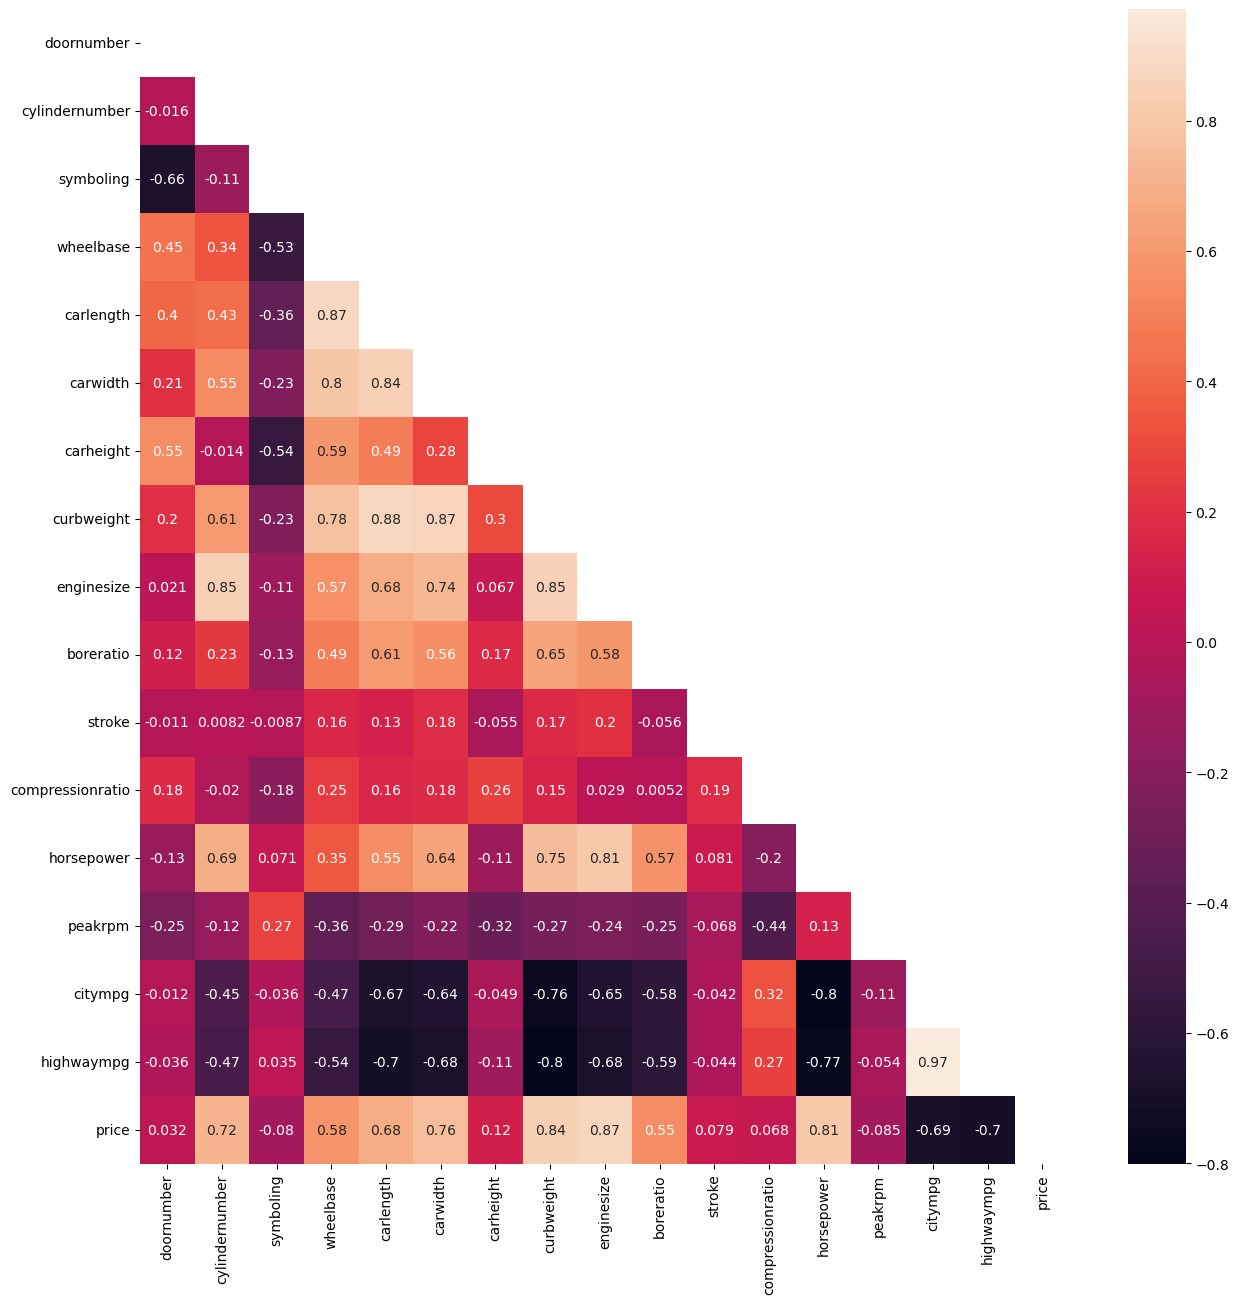

In [114]:
fig = plt.figure(figsize=(15,15))

mask = np.triu(np.ones_like(num_df.corr()))
sns.heatmap(num_df.corr(), mask=mask, annot=True)

- enginesize, curbweight and horsepower are the highest correlated features with the target "price"
- doornumber, symboling, stroke and peakrpm seem to have little or no correlation with target "price"
- length, width and height are highly correlated , so combining them as one feature "volume" might be a good approach
- enginesize and cylindernumber are highly correlated as they more or less carry similar info.

In [118]:
#  creating care_volume
num_df['car_volume'] = num_df['carlength'] * num_df['carwidth'] * num_df['carheight']

In [119]:
num_df[['carlength', 'carwidth', 'carheight', 'car_volume', 'price']].corr()

,carlength,carwidth,carheight,car_volume,price
carlength,1.000000,0.841118,0.491029,0.950070,0.682920
carwidth,0.841118,1.000000,0.279210,0.832217,0.759325
carheight,0.491029,0.279210,1.000000,0.704074,0.119336
car_volume,0.950070,0.832217,0.704074,1.000000,0.624339
price,0.682920,0.759325,0.119336,0.624339,1.000000


- Looks good, the correlation with the target is carried in the new feature as well

In [120]:
#  dropping the features we used as well as the unnecessary ones
num_df.drop(['carlength', 'carwidth', 'carheight', 
             'symboling', 'doornumber', 'stroke', 'peakrpm'], axis=1, inplace=True)

num_df.head()

,cylindernumber,wheelbase,curbweight,enginesize,boreratio,compressionratio,horsepower,citympg,highwaympg,price,car_volume
0,4,88.6,2548,130,3.47,9.0,111,21,27,13495.0,528019.904
1,4,88.6,2548,130,3.47,9.0,111,21,27,16500.0,528019.904
2,6,94.5,2823,152,2.68,9.0,154,19,26,16500.0,587592.640
3,4,99.8,2337,109,3.19,10.0,102,24,30,13950.0,634816.956
4,5,99.4,2824,136,3.19,8.0,115,18,22,17450.0,636734.832


<Axes: >

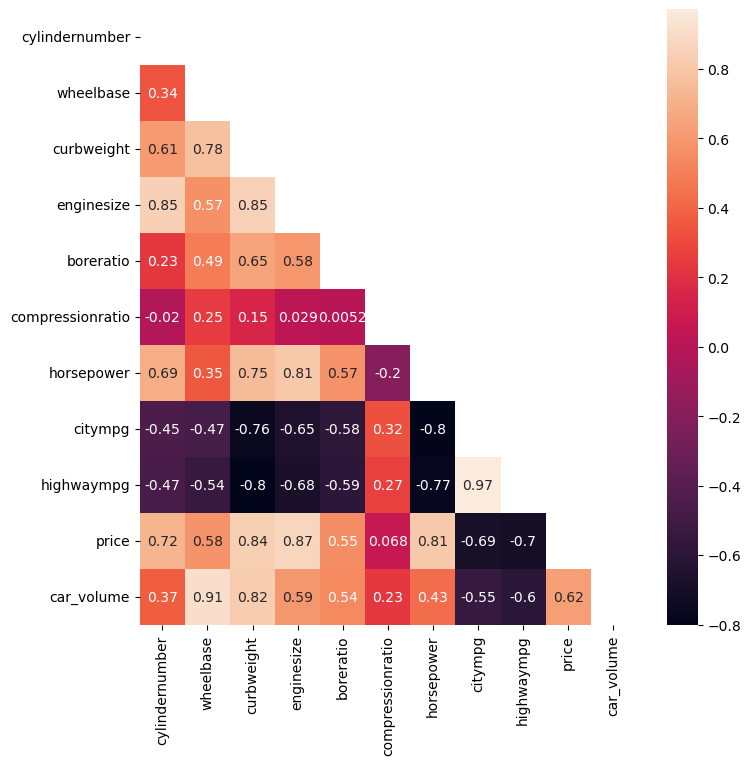

In [124]:
fig = plt.figure(figsize=(8,8))

mask = np.triu(np.ones_like(num_df.corr()))
sns.heatmap(num_df.corr(), mask=mask, annot=True)

In [121]:
#calculating vif

vif_df = calculate_vif(num_df)
vif_df

,Variable,VIF
0,const,1498.679765
1,cylindernumber,6.673032
2,wheelbase,7.270878
3,curbweight,15.848214
4,enginesize,14.918732
5,boreratio,2.745196
6,compressionratio,2.145970
7,horsepower,7.407488
8,citympg,25.668155
9,highwaympg,23.520194


- 'citympg' is Mileage in city and 'highwaympg' is Mileage on highway, so it's undersandable that they're highly correlated so, dropping one of them seems right. we'll keep 'highwaympg'
- Also, enginesize and horsepower have a similar relationship, maybe we can take the mean of them.

In [125]:
# Dropping citympg
num_df.drop('citympg', axis=1, inplace=True)
num_df.head(1)

,cylindernumber,wheelbase,curbweight,enginesize,boreratio,compressionratio,horsepower,highwaympg,price,car_volume
0,4,88.6,2548,130,3.47,9.0,111,27,13495.0,528019.904


<Axes: xlabel='enginesize', ylabel='horsepower'>

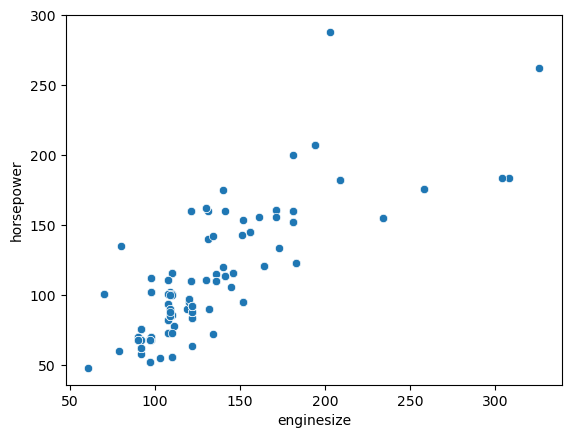

In [126]:
sns.scatterplot(x='enginesize', y='horsepower', data=num_df)

- We probably could take the average of both columns as new feature.

In [128]:
num_df['engine_horse'] = (num_df['enginesize'] + num_df['horsepower']) / 2
num_df.head(2)

,cylindernumber,wheelbase,curbweight,enginesize,boreratio,compressionratio,horsepower,highwaympg,price,car_volume,engine_horse
0,4,88.6,2548,130,3.47,9.0,111,27,13495.0,528019.904,120.5
1,4,88.6,2548,130,3.47,9.0,111,27,16500.0,528019.904,120.5


In [129]:
num_df[['enginesize', 'horsepower', 'engine_horse', 'price']].corr()

,enginesize,horsepower,engine_horse,price
enginesize,1.000000,0.809769,0.953805,0.874145
horsepower,0.809769,1.000000,0.948636,0.808139
engine_horse,0.953805,0.948636,1.000000,0.885111
price,0.874145,0.808139,0.885111,1.000000


- We can see that the correlation is carried in the new feature.

In [130]:
num_df.drop(['enginesize', 'horsepower'], axis=1, inplace=True)
num_df.head(2)

,cylindernumber,wheelbase,curbweight,boreratio,compressionratio,highwaympg,price,car_volume,engine_horse
0,4,88.6,2548,3.47,9.0,27,13495.0,528019.904,120.5
1,4,88.6,2548,3.47,9.0,27,16500.0,528019.904,120.5


In [132]:
df_new = pd.concat([df_cleaned.select_dtypes(include='object'), num_df], axis=1)
df_new.head(3)

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,cylindernumber,wheelbase,curbweight,boreratio,compressionratio,highwaympg,price,car_volume,engine_horse
0,gas,std,other,rwd,front,ohc,mpfi,4,88.6,2548,3.47,9.0,27,13495.0,528019.904,120.5
1,gas,std,other,rwd,front,ohc,mpfi,4,88.6,2548,3.47,9.0,27,16500.0,528019.904,120.5
2,gas,std,hatchback,rwd,front,ohcv,mpfi,6,94.5,2823,2.68,9.0,26,16500.0,587592.640,153.0


##### Training the champion model on the new wrangled data

In [134]:
X = df_new.loc[:, df_new.columns != 'price']
y = df_new['price']

In [135]:
X.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,cylindernumber,wheelbase,curbweight,boreratio,compressionratio,highwaympg,car_volume,engine_horse
0,gas,std,other,rwd,front,ohc,mpfi,4,88.6,2548,3.47,9.0,27,528019.904,120.5
1,gas,std,other,rwd,front,ohc,mpfi,4,88.6,2548,3.47,9.0,27,528019.904,120.5
2,gas,std,hatchback,rwd,front,ohcv,mpfi,6,94.5,2823,2.68,9.0,26,587592.640,153.0
3,gas,std,sedan,fwd,front,ohc,mpfi,4,99.8,2337,3.19,10.0,30,634816.956,105.5
4,gas,std,sedan,4wd,front,ohc,mpfi,5,99.4,2824,3.19,8.0,22,636734.832,125.5


In [136]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state = 42)

In [150]:
df_new.select_dtypes(include='number').columns.values

array(['cylindernumber', 'wheelbase', 'curbweight', 'boreratio',
       'compressionratio', 'highwaympg', 'price', 'car_volume',
       'engine_horse'], dtype=object)

In [151]:
columns_to_scale2 = ['wheelbase', 'curbweight', 'boreratio', 'compressionratio', 'highwaympg', 
                     'car_volume','engine_horse']


In [152]:
transformer2 = ColumnTransformer(transformers=[('cat', OneHotEncoder(), columns_to_encode),
                                              ('num', StandardScaler(), columns_to_scale2)],
                                remainder='passthrough')
rf_pipe2 = Pipeline([('preprocessor', transformer2),
                    ('model' , RandomForestRegressor())])


In [153]:
rf_grid_new = GridSearchCV(rf_pipe2, param_grid=rf_param, scoring='neg_mean_squared_error', cv=10, verbose=3)
rf_grid_new.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV 1/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=25;, score=-7848631.716 total time=   0.0s
[CV 2/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=25;, score=-19328312.573 total time=   0.0s
[CV 3/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=25;, score=-12114147.873 total time=   0.0s
[CV 4/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=25;, score=-12777771.635 total time=   0.0s
[CV 5/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=25;, score=-18163432.641 total time=   0.0s
[CV 6/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=25;, score=-6992833.975 total time=   0.0s
[CV 7/10] END model__max_depth=3, model__ma

[CV 6/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=50;, score=-5042280.134 total time=   0.0s
[CV 7/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=50;, score=-6369621.651 total time=   0.0s
[CV 8/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=50;, score=-16779419.371 total time=   0.0s
[CV 9/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=50;, score=-4797075.934 total time=   0.0s
[CV 10/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=50;, score=-23894037.137 total time=   0.0s
[CV 1/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=100;, score=-4758478.400 total time=   0.1s
[CV 2/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=100

[CV 1/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=150;, score=-4646568.656 total time=   0.0s
[CV 2/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=150;, score=-11036244.923 total time=   0.1s
[CV 3/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=150;, score=-4466888.448 total time=   0.1s
[CV 4/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=150;, score=-6258848.995 total time=   0.1s
[CV 5/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=150;, score=-11543955.668 total time=   0.0s
[CV 6/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=150;, score=-4667893.850 total time=   0.1s
[CV 7/10] END model__max_depth=3, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators

[CV 8/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=25;, score=-14894544.040 total time=   0.0s
[CV 9/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=25;, score=-7095207.967 total time=   0.0s
[CV 10/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=25;, score=-29854055.102 total time=   0.0s
[CV 1/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=50;, score=-5012538.636 total time=   0.0s
[CV 2/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=50;, score=-7278172.630 total time=   0.0s
[CV 3/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=50;, score=-4811793.697 total time=   0.0s
[CV 4/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=50;,

[CV 6/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=100;, score=-5028263.530 total time=   0.0s
[CV 7/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=100;, score=-5943856.553 total time=   0.0s
[CV 8/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=100;, score=-14428137.547 total time=   0.0s
[CV 9/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=100;, score=-5557785.574 total time=   0.0s
[CV 10/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=100;, score=-20883799.130 total time=   0.1s
[CV 1/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=150;, score=-4807248.891 total time=   0.1s
[CV 2/10] END model__max_depth=3, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimator

[CV 5/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=25;, score=-17951516.958 total time=   0.0s
[CV 6/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=25;, score=-6715887.064 total time=   0.0s
[CV 7/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=25;, score=-15442439.255 total time=   0.0s
[CV 8/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=25;, score=-8848427.421 total time=   0.0s
[CV 9/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=25;, score=-4555258.637 total time=   0.0s
[CV 10/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=25;, score=-16033899.341 total time=   0.0s
[CV 1/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=50;

[CV 1/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=100;, score=-5191299.644 total time=   0.1s
[CV 2/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=100;, score=-5963168.339 total time=   0.1s
[CV 3/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=100;, score=-3249180.214 total time=   0.0s
[CV 4/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=100;, score=-5199852.443 total time=   0.1s
[CV 5/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=100;, score=-18432507.532 total time=   0.1s
[CV 6/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=100;, score=-8611405.576 total time=   0.1s
[CV 7/10] END model__max_depth=3, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=

[CV 6/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=150;, score=-7320543.099 total time=   0.1s
[CV 7/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=150;, score=-11778009.293 total time=   0.1s
[CV 8/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=150;, score=-24416804.368 total time=   0.1s
[CV 9/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=150;, score=-11060571.734 total time=   0.1s
[CV 10/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=150;, score=-33922747.853 total time=   0.1s
[CV 1/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=25;, score=-7088848.531 total time=   0.0s
[CV 2/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimato

[CV 5/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=50;, score=-13713991.726 total time=   0.0s
[CV 6/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=50;, score=-4332960.525 total time=   0.0s
[CV 7/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=50;, score=-5828089.092 total time=   0.0s
[CV 8/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=50;, score=-16062858.847 total time=   0.0s
[CV 9/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=50;, score=-4944913.983 total time=   0.0s
[CV 10/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=50;, score=-16847598.117 total time=   0.0s
[CV 1/10] END model__max_depth=6, model__max_features=sqrt, model__max_leaf_nodes=9, model__n_estimators=100

[CV 1/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=150;, score=-7010356.200 total time=   0.1s
[CV 2/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=150;, score=-19468773.267 total time=   0.0s
[CV 3/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=150;, score=-12469728.818 total time=   0.0s
[CV 4/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=150;, score=-10298972.646 total time=   0.1s
[CV 5/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=150;, score=-17159551.125 total time=   0.1s
[CV 6/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=150;, score=-5314140.165 total time=   0.0s
[CV 7/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimato

[CV 7/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=25;, score=-6473167.662 total time=   0.0s
[CV 8/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=25;, score=-15169157.742 total time=   0.0s
[CV 9/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=25;, score=-5146931.481 total time=   0.0s
[CV 10/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=25;, score=-16516835.512 total time=   0.0s
[CV 1/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=50;, score=-4695236.713 total time=   0.0s
[CV 2/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=50;, score=-6607590.609 total time=   0.0s
[CV 3/10] END model__max_depth=6, model__max_features=log2, model__max_leaf_nodes=9, model__n_estimators=50;,

[CV 3/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=100;, score=-4695615.508 total time=   0.1s
[CV 4/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=100;, score=-7486715.622 total time=   0.1s
[CV 5/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=100;, score=-21246107.893 total time=   0.1s
[CV 6/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=100;, score=-7383601.871 total time=   0.0s
[CV 7/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=100;, score=-14396376.389 total time=   0.1s
[CV 8/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=100;, score=-10362718.075 total time=   0.1s
[CV 9/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=3, model__n_estimator

[CV 8/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=150;, score=-9262958.361 total time=   0.2s
[CV 9/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=150;, score=-4754151.712 total time=   0.2s
[CV 10/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=150;, score=-16300802.245 total time=   0.2s
[CV 1/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=25;, score=-4404046.528 total time=   0.0s
[CV 2/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=25;, score=-6494064.308 total time=   0.0s
[CV 3/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=25;, score=-2988999.262 total time=   0.0s
[CV 4/10] END model__max_depth=6, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=25

[CV 6/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=50;, score=-7097473.666 total time=   0.0s
[CV 7/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=50;, score=-12384919.562 total time=   0.0s
[CV 8/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=50;, score=-19510823.183 total time=   0.0s
[CV 9/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=50;, score=-14570892.010 total time=   0.0s
[CV 10/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=50;, score=-43133607.610 total time=   0.0s
[CV 1/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=100;, score=-7116498.326 total time=   0.0s
[CV 2/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=3, model__n_estimators=1

[CV 1/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=150;, score=-4695444.837 total time=   0.1s
[CV 2/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=150;, score=-9070948.130 total time=   0.1s
[CV 3/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=150;, score=-3860662.657 total time=   0.0s
[CV 4/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=150;, score=-5352526.199 total time=   0.0s
[CV 5/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=150;, score=-11365085.715 total time=   0.0s
[CV 6/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=150;, score=-3875092.340 total time=   0.0s
[CV 7/10] END model__max_depth=9, model__max_features=sqrt, model__max_leaf_nodes=6, model__n_estimators=

[CV 1/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=50;, score=-6413051.512 total time=   0.0s
[CV 2/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=50;, score=-17412255.797 total time=   0.0s
[CV 3/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=50;, score=-9538415.791 total time=   0.0s
[CV 4/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=50;, score=-10080923.104 total time=   0.0s
[CV 5/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=50;, score=-16319998.059 total time=   0.0s
[CV 6/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=50;, score=-7846498.848 total time=   0.0s
[CV 7/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=3, model__n_estimators=50;,

[CV 7/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=100;, score=-5968417.397 total time=   0.0s
[CV 8/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=100;, score=-12178282.409 total time=   0.0s
[CV 9/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=100;, score=-5052725.511 total time=   0.0s
[CV 10/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=100;, score=-21398453.058 total time=   0.0s
[CV 1/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=150;, score=-4664291.548 total time=   0.1s
[CV 2/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimators=150;, score=-9826597.814 total time=   0.1s
[CV 3/10] END model__max_depth=9, model__max_features=log2, model__max_leaf_nodes=6, model__n_estimator

[CV 5/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=25;, score=-21659837.647 total time=   0.0s
[CV 6/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=25;, score=-7365016.086 total time=   0.0s
[CV 7/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=25;, score=-18618174.345 total time=   0.0s
[CV 8/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=25;, score=-9353634.789 total time=   0.0s
[CV 9/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=25;, score=-7720725.630 total time=   0.0s
[CV 10/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=25;, score=-18117917.666 total time=   0.0s
[CV 1/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=3, model__n_estimators=50;

[CV 2/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=100;, score=-6126829.389 total time=   0.1s
[CV 3/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=100;, score=-3260391.393 total time=   0.1s
[CV 4/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=100;, score=-4847580.953 total time=   0.1s
[CV 5/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=100;, score=-17562463.193 total time=   0.1s
[CV 6/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=100;, score=-8051931.482 total time=   0.1s
[CV 7/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators=100;, score=-15450456.239 total time=   0.1s
[CV 8/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=6, model__n_estimators

[CV 7/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=150;, score=-14941036.550 total time=   0.2s
[CV 8/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=150;, score=-7587528.819 total time=   0.2s
[CV 9/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=150;, score=-6002424.091 total time=   0.2s
[CV 10/10] END model__max_depth=9, model__max_features=None, model__max_leaf_nodes=9, model__n_estimators=150;, score=-14871522.479 total time=   0.2s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         array(['fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem'], dtype=object)),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['wheelbase',
                                                                          'curbweight',
                                                                          'boreratio',
                                                                          'compressionratio',
                                                                          'highwaympg',
                                                                          'car_volume',
                                                                          'engine_horse'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [3, 6, 9],
                         'model__max_features': ['sqrt', 'log2', None],
                         'model__max_leaf_nodes': [3, 6, 9],
                         'model__n_estimators': [25, 50, 100, 150]},
             scoring='neg_mean_squared_error', verbose=3)

In [154]:
rf_best_mode_new = rf_grid_new.best_estimator_
y_pred_rf = rf_best_mode_new.predict(X_test)


In [155]:
mae, mse, rmse, r2 = eval_metrics(y_test,y_pred_rf)

print_metrics(mae, mse, rmse, r2)

Mean Absolute Error: 1983.6389332434
Mean Squared Error: 9640503.553576682
Root Mean Squared Error: 3104.9160300363487
Coefficient of determination R^2: 0.8778817769078082
